# Customer Segmentation

This data is a **clustering problem**, trying to perform customer segmentation.

- **customer ID**: unique customer ID
- **gender**
- **age**
- **annual income**
- **spending score**: Score assigned by the mall based on customer behavior and spending nature

## 1. Import Data

In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

# load dataset
df = pd.read_csv("data/Mall_Customers.csv")

In [2]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


## 2. Cleaning

Let's see whether missing values.

Before anything, let's drop the customer ID column.

In [4]:
df = df.drop(columns=['CustomerID'])

### Check missing value

In [5]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Lucky!!! There are no missing data!

Let's also check the unique value to see any anomaly....

### Check whether any incorrect data entry

In [6]:
for col in df.columns:
    print(f"{col}:", df[col].unique())

Gender: ['Male' 'Female']
Age: [19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41]
Annual Income (k$): [ 15  16  17  18  19  20  21  23  24  25  28  29  30  33  34  37  38  39
  40  42  43  44  46  47  48  49  50  54  57  58  59  60  61  62  63  64
  65  67  69  70  71  72  73  74  75  76  77  78  79  81  85  86  87  88
  93  97  98  99 101 103 113 120 126 137]
Spending Score (1-100): [39 81  6 77 40 76 94  3 72 14 99 15 13 79 35 66 29 98 73  5 82 32 61 31
 87  4 92 17 26 75 36 28 65 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49
 53 44 57 58 43 91 95 11  9 34 71 88  7 10 93 12 97 74 22 90 20 16 89  1
 78 83 27 63 86 69 24 68 85 23  8 18]


### Label encoding

Because Gender has only two possible values, we can safely use label encoding turning Gender to 0 and 1.

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Gender"].unique()

array([1, 0])

In [8]:
# we can call le.classes_ to know what it maps to
print(le.classes_)

# then we can try transform
le.transform(le.classes_)

['Female' 'Male']


array([0, 1])

## 3. Exploratory Data Analysis

Let's do a pair plot to quickly gain some intuition of the dataset

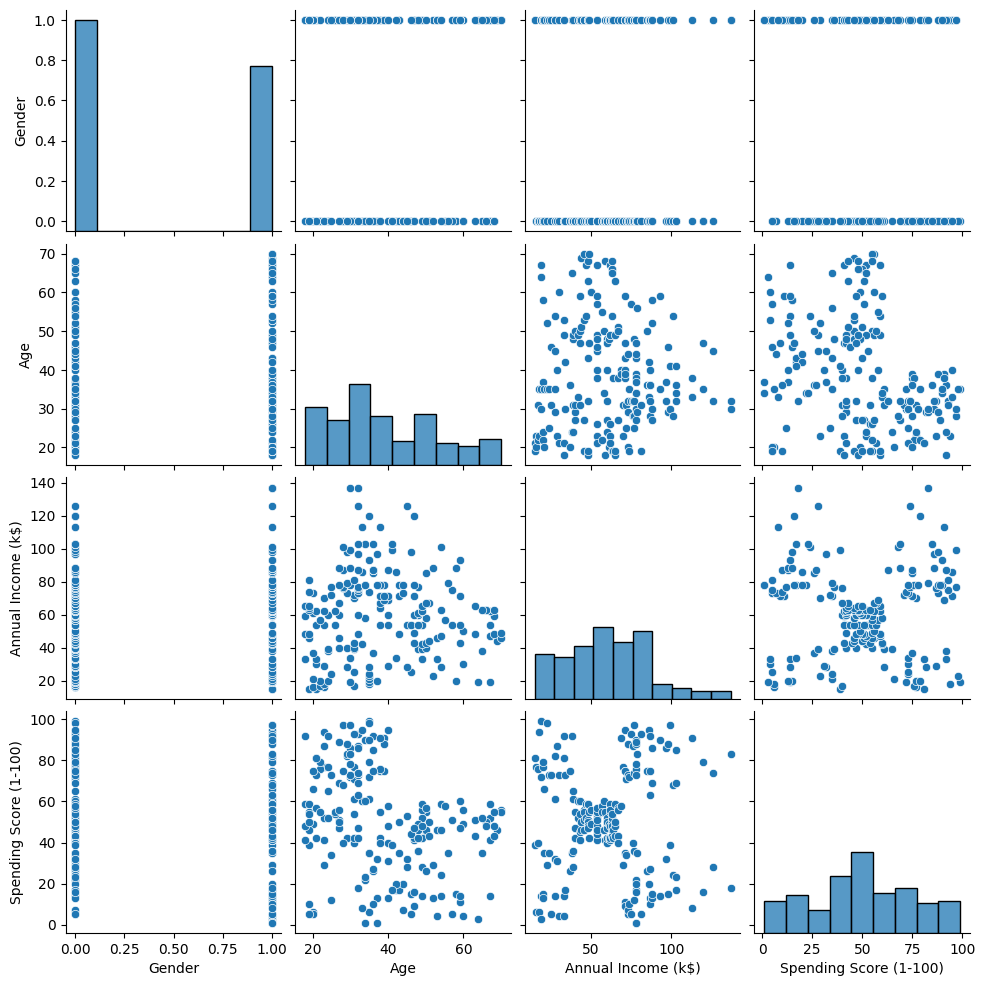

In [9]:
sns.pairplot(df)
plt.show()

This is what we can observed:

- The most regular customers for the Mall has age around 30-35 years of age. Whereas the the senior citizens age group is the least frequent visitor in the Mall.

- we can see that most people have a spedning score at around 50

- there are few people who earn more than 100 US Dollars.

- we can see that there is almost no information in Gender, so let's drop it later on....

- We can kinda see some cluster in Spending Score x Annual Income, so maybe these two features can be used for clustering.... 

- We can also see some cluster in Age x Spending Score as well....(but a bit difficult to see...XD)

In [10]:
#let's drop the Gender column for good
df = df.drop(columns = ['Gender'])

## 4. Modeling

### Now, let's set our X

In [11]:
X = df.to_numpy()
X.shape

(200, 3)

### No split or scaling

- Since we are doing unsupervised algorithm, we do not have to split our data
- Since we are doing k-means which is a distance-based algorithm, we may better NOT scale, because it may distort our data (but this is once again case by case....for now, we don't)

### Finding the optimal k

In unsupervised learning, it does not really make sense to perform gridsearch since there is no really any ground truth.  Maybe the distance within could be good, but still it is arguable.

Thus, we just simply let the KMeans figure out the cluster for us.

The most important hyperparameter we have to set is the <code>k</code> variable, indicating how many clusters we want.  Here we can use the elbow method.

Text(0.5, 1.0, 'Elbow curve')

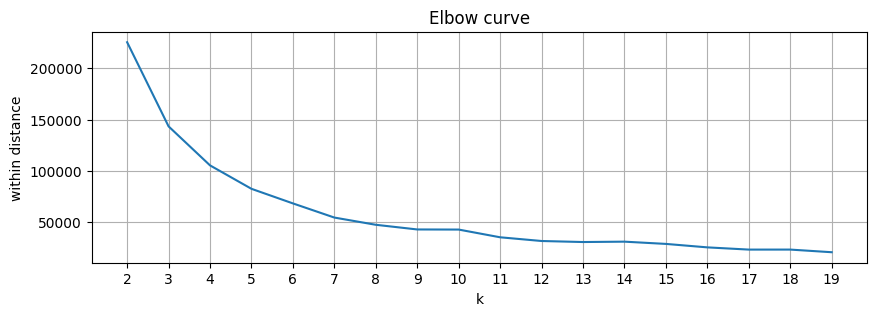

In [12]:
from sklearn.cluster import KMeans

#sum of squared distances
ssd = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, n_init="auto")
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 3))
plt.plot(range(2, 20), ssd)
plt.xticks(range(2, 20))
plt.ylabel("within distance")
plt.xlabel("k")
plt.grid(True)
plt.title('Elbow curve')

### K-Means

It seems around 5 or 6 is good.  So let's perform the clustering based on the best param we found.

In [13]:
from sklearn.cluster import KMeans

# Define number of
k = 5

# Define model
model = KMeans(n_clusters=k)

# Fit model
model.fit(X)
yhat = model.labels_

yhat

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

### Visualize results

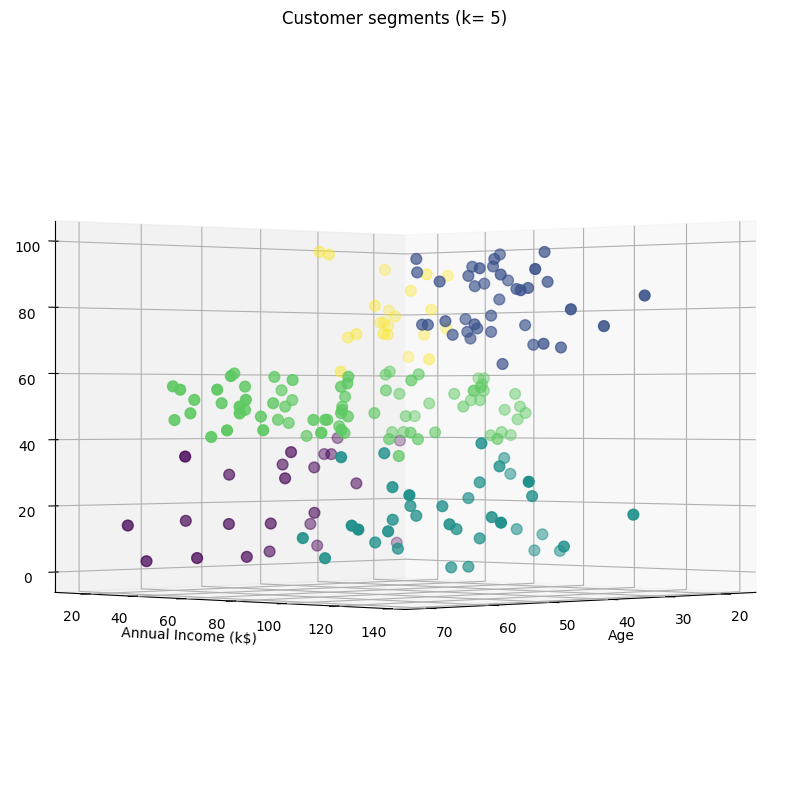

In [14]:
# Plot the data
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Plot train
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=yhat, s=60)

#in case you want nice legends.

#segment
# X_1 = X[yhat == 0]
# X_2 = X[yhat == 1]
# X_3 = X[yhat == 2]
# X_4 = X[yhat == 3]
# X_5 = X[yhat == 4]

# ax.scatter(X_1[:, 0], X_1[:, 1], X_1[:, 2], c='red', s=60, label = "segment2 (train)")
# ax.scatter(X_2[:, 0], X_2[:, 1], X_2[:, 2], c='red', s=60, label = "segment2 (train)")
# ax.scatter(X_3[:, 0], X_3[:, 1], X_3[:, 2], c='green', s=60, label = "segment3 (train)")
# ax.scatter(X_4[:, 0], X_4[:, 1], X_4[:, 2], c='orange', s=60, label = "segment4 (train)")
# ax.scatter(X_5[:, 0], X_5[:, 1], X_5[:, 2], c='purple', s=60, label = "segment5 (train)")

ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title(f'Customer segments (k= {k})')
plt.show()

### Some other use cases for clustering

- Recommender systems (grouping together users with similar viewing patterns on Netflix, in order to recommend similar content)
- Anomaly detection (fraud detection, detecting defective mechanical parts)
- Genetics (clustering DNA patterns to analyze evolutionary biology)